In [3]:
import pandas as pandas
df=pandas.read_csv('Final13022.csv',encoding='windows-1252')

In [4]:
df.shape

(2596, 7)

In [3]:
conversion_dict={0:'False',1:'True'}

In [4]:
df['label']=df['label'].replace(conversion_dict)#Replace 1,0 to real and fake

In [1]:
df.shape

NameError: name 'df' is not defined

<Axes: xlabel='label_text', ylabel='count'>

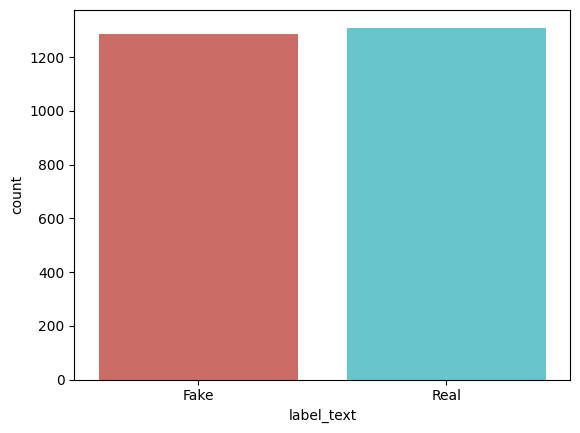

In [7]:
import seaborn as sb
def create_distribution(datafile):
    return sb.countplot(x='label_text',data =datafile, palette ='hls')
create_distribution(df)

In [8]:
def data_qualityCheck():
    df.isnull().sum()
    df.info()
    
data_qualityCheck()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   myId        2596 non-null   int64 
 1   id          2596 non-null   int64 
 2   filename    2596 non-null   object
 3   title       1301 non-null   object
 4   text        2596 non-null   object
 5   label_text  2596 non-null   object
 6   label       2596 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 142.1+ KB


In [10]:
y=df.label_text
y.head()

0    Fake
1    Real
2    Real
3    Fake
4    Fake
Name: label_text, dtype: object

In [12]:
df.drop("label_text",axis=1)

,myId,id,filename,title,text,label
0,1,0,1_fake_new_dataset_3120,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,0
1,2,1,1_fake_new_dataset_3120,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,1
2,3,2,1_fake_new_dataset_3120,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,1
3,5,4,1_fake_new_dataset_3120,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,0
4,6,5,1_fake_new_dataset_3120,NY TIMES WORRIES HALF OF AMERICANS WILL REFUSE...,The New York Times has published an article by...,0
...,...,...,...,...,...,...
2591,4409,4056,2_news_4129,NaN,Vitamin C with Zinc prevent and treat the coro...,0
2592,4410,4059,2_news_4129,NaN,Video of a girl dying of coronavirus in a shop...,0
2593,4411,4062,2_news_4129,NaN,The first patient diagnosed with COVID-19 was ...,0
2594,4412,4063,2_news_4129,NaN,You no longer need to have contact with someon...,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(df['text'],y,test_size=0.20,random_state=9)

In [14]:
X_train.head(10)

211     In our previous analysis we warned traders tha...
2460    You can maintain the alkaline state of the bod...
846     There is no need for the public to wear surgic...
1022    Under the category, the more things change, th...
2235    Why you should not take seriously this card on...
2591    Vitamin C with Zinc prevent and treat the coro...
1468    Most quarantine decisions are up to states and...
1905    It occurs to me that the world wide death rare...
2419    The Simpsons have predicted the coronavirus pa...
1837    A midshipman at the U.S. Naval Academy in Anna...
Name: text, dtype: object

In [15]:
X_test.head(10)

969     An uproar took place in a kindergarten in Rish...
709     The 2019 novel coronavirus is a new virus that...
1655         Nah. DJT said its all set. CDC is in control
721     While there is no scientific link that connect...
2589    The Chinese company Ruilan Bao Hu San Biotech ...
1314    The Trump administration recently announced pl...
2468      The Chinese accept Islam en masse (20 millions)
589     “When you've got had current vacation to Wuhan...
2242       You can get coronavirus from makeup and creams
151     Traditional infection-control and public healt...
Name: text, dtype: object

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
print(count_vectorizer)
print(count_train)

CountVectorizer(stop_words='english')
  (0, 18010)	1
  (0, 2105)	3
  (0, 24683)	1
  (0, 23259)	1
  (0, 14396)	1
  (0, 18792)	1
  (0, 13946)	1
  (0, 6005)	1
  (0, 21928)	1
  (0, 14526)	1
  (0, 7666)	1
  (0, 15164)	1
  (0, 4128)	3
  (0, 15318)	1
  (0, 14881)	1
  (0, 25248)	1
  (0, 19721)	1
  (0, 13527)	1
  (0, 19862)	1
  (0, 21515)	1
  (0, 4215)	1
  (0, 21762)	1
  (0, 391)	1
  (0, 15660)	1
  (0, 10306)	2
  :	:
  (2075, 2904)	1
  (2075, 19065)	1
  (2075, 13862)	1
  (2075, 8662)	1
  (2075, 20986)	2
  (2075, 1402)	1
  (2075, 1662)	1
  (2075, 9479)	1
  (2075, 15991)	1
  (2075, 6111)	1
  (2075, 17704)	1
  (2075, 17410)	1
  (2075, 4428)	1
  (2075, 12030)	2
  (2075, 10645)	2
  (2075, 4960)	1
  (2075, 5037)	1
  (2075, 20233)	1
  (2075, 2418)	1
  (2075, 10125)	1
  (2075, 10449)	2
  (2075, 4969)	2
  (2075, 19282)	1
  (2075, 10646)	1
  (2075, 5039)	1


In [5]:
corpus = df['text'].tolist()
labels = df['label'].tolist()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(corpus,labels,test_size=0.20,random_state=9,shuffle=True)

In [12]:
import pandas as pandas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import string
import re
import nltk
from nltk.corpus import stopwords

In [24]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [25]:
cleaned_corpus =[]
for tt in X_train:
    cleaned_text =re.sub(r'[^\w\s]', '', tt)#remove punctuation
    cleaned_text=re.sub('\n','',cleaned_text) #Remove New lines
    cleaned_text = cleaned_text.lower()
    cleaned_text = remove_stopwords(cleaned_text)
    cleaned_corpus.append(cleaned_text)


In [27]:
tokenized_corpus = []   
for sentence in cleaned_corpus:
    tokens = nltk.word_tokenize(sentence)
    tokenized_corpus.append(tokens)

In [32]:
tfidf_vectorizer=TfidfVectorizer()
Xt_vec = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in tokenized_corpus])
Xt_vec

<2076x36369 sparse matrix of type '<class 'numpy.float64'>'
	with 216393 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.neighbors import KNeighborsClassifier
global knn
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(Xt_vec,y_train)

KNeighborsClassifier(n_neighbors=2)

In [36]:
news='Delhi: Eight nurses test positive for Covid-19 at Kalawati Saran Hospital. Another nurse at the Kalawati Saran Hospital in central Delhi has tested positive for Covid-19, taking to eight the total number of nurses there affected by the highly infectious disease. At least 8 nurses at Kalawati Saran Hospital have tested positive for novel coronavirus , a source told IANS on Sunday, adding that the nurses had been working at the hospitals paediatric ward. Their tests were conducted at the Lady Hardinge Hospital. All are now admitted in the isolation ward and their contacts have been traced and sent for home isolation.There are many healthcare workers who have tested positive for novel coronavirus, however, the government has not released any separate data on them. The source said: Now we have to face this. Sometimes a doctor test is turning positive, another time it is a nurse. We have been fighting on the forefront.The largest number of infected hospital workers has been reported from Babu Jagjivan Ram Memorial Hospital where as many as 58 staffers, including doctors and nurses, of the hospital have tested positive for coronavirus, Of them, 70 per cent were asymptomatic. Prior to this, a doctor and two nurses from the Lok Nayak Hospital had tested positive. Other hospitals in the national capital that have reported positive cases of novel coronavirus amongst health workers are the Ram Manohar Lohia Hospital , Safdarjung Hospital, Max Hospital, Sir Ganga Ram Hospital, and various Mohalla clinic etc.'
testData = [news]
testData

['Delhi: Eight nurses test positive for Covid-19 at Kalawati Saran Hospital. Another nurse at the Kalawati Saran Hospital in central Delhi has tested positive for Covid-19, taking to eight the total number of nurses there affected by the highly infectious disease. At least 8 nurses at Kalawati Saran Hospital have tested positive for novel coronavirus , a source told IANS on Sunday, adding that the nurses had been working at the hospitals paediatric ward. Their tests were conducted at the Lady Hardinge Hospital. All are now admitted in the isolation ward and their contacts have been traced and sent for home isolation.There are many healthcare workers who have tested positive for novel coronavirus, however, the government has not released any separate data on them. The source said: Now we have to face this. Sometimes a doctor test is turning positive, another time it is a nurse. We have been fighting on the forefront.The largest number of infected hospital workers has been reported from 

In [38]:
cleaned_text = []

for tt in testData:
    cleaned =re.sub(r'[^\w\s]', '', tt)#remove punctuation
    cleaned=re.sub('\n','',cleaned) #Remove New lines
    cleaned = cleaned.lower()
    cleaned = remove_stopwords(cleaned)
    cleaned_text.append(cleaned)

cleaned_text    

['delhi eight nurses test positive covid19 kalawati saran hospital another nurse kalawati saran hospital central delhi tested positive covid19 taking eight total number nurses affected highly infectious disease least 8 nurses kalawati saran hospital tested positive novel coronavirus source told ians sunday adding nurses working hospitals paediatric ward tests conducted lady hardinge hospital admitted isolation ward contacts traced sent home isolationthere many healthcare workers tested positive novel coronavirus however government released separate data source said face sometimes doctor test turning positive another time nurse fighting forefrontthe largest number infected hospital workers reported babu jagjivan ram memorial hospital many 58 staffers including doctors nurses hospital tested positive coronavirus 70 per cent asymptomatic prior doctor two nurses lok nayak hospital tested positive hospitals national capital reported positive cases novel coronavirus amongst health workers ra

In [39]:
tokenized_text = []   
for sentence in cleaned_text:
    tokens = nltk.word_tokenize(sentence)
    tokenized_text.append(tokens)
    
newTest_X = tfidf_vectorizer.transform([' '.join(tokens) for tokens in tokenized_text])
newTest_X

<1x36369 sparse matrix of type '<class 'numpy.float64'>'
	with 91 stored elements in Compressed Sparse Row format>

In [42]:
y_pred=knn.predict(newTest_X)
y_pred

array(['False'], dtype='<U5')

In [43]:
news1='We can now officially put to rest all comparisons of COVID-19 to influenza. Coronavirus is killing more Americans than the flu and almost everything else. According to data compiled by the Washington Post, COVID-19 is now the second-leading cause of death in America.The upward march of these numbers is steady and disturbing. The week of March 16, COVID-19 didn’t rank among the 15 most common causes of death. The next week, it ranked seventh. The following week, it moved up to third. The week of April 6, COVID-19 killed more people than anything besides heart disease.These numbers are a tragic milestone, and they’re also a verdict on attempts to downplay the severity of this event. Messaging from political leaders and some media voices early in this outbreak comparing it to the flu were wrong. They might have been well-intentioned efforts to keep people from panicking, but that point is moot now.Coronavirus is the most formidable public health threat in a generation. The time for minimizing is over. The time for aggressive testing, social distancing and (hopefully soon) treatment is now.'
testData = [news1]
cleaned_text = []

for tt in testData:
    cleaned =re.sub(r'[^\w\s]', '', tt)#remove punctuation
    cleaned=re.sub('\n','',cleaned) #Remove New lines
    cleaned = cleaned.lower()
    cleaned = remove_stopwords(cleaned)
    cleaned_text.append(cleaned)

cleaned_text  

['officially put rest comparisons covid19 influenza coronavirus killing americans flu almost everything else according data compiled washington post covid19 secondleading cause death americathe upward march numbers steady disturbing week march 16 covid19 didnt rank among 15 common causes death next week ranked seventh following week moved third week april 6 covid19 killed people anything besides heart diseasethese numbers tragic milestone theyre also verdict attempts downplay severity event messaging political leaders media voices early outbreak comparing flu wrong might wellintentioned efforts keep people panicking point moot nowcoronavirus formidable public health threat generation time minimizing time aggressive testing social distancing hopefully soon treatment']

In [45]:
tokenized_text = []   
for sentence in cleaned_text:
    tokens = nltk.word_tokenize(sentence)
    tokenized_text.append(tokens)
    
newTest_X = tfidf_vectorizer.transform([' '.join(tokens) for tokens in tokenized_text])
newTest_X

<1x36369 sparse matrix of type '<class 'numpy.float64'>'
	with 88 stored elements in Compressed Sparse Row format>

In [46]:
y_pred=knn.predict(newTest_X)
y_pred

array(['False'], dtype='<U5')